In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Outcome'])
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

clf = LogisticRegression(max_iter = 500, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Logistic Regression:\n",
    f"Accuracy: {accuracy_score(y_test, y_pred)}\n",
    f"Precision: {precision_score(y_test, y_pred)}\n",
    f"Recall: {recall_score(y_test, y_pred)}\n",
    f"F1: {f1_score(y_test, y_pred)}"
)

Logistic Regression:
 Accuracy: 0.7748917748917749
 Precision: 0.7301587301587301
 Recall: 0.5679012345679012
 F1: 0.6388888888888888


In [5]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
print("Decision Tree:\n",
    f"Accuracy: {accuracy_score(y_test, y_pred_tree)}\n",
    f"Precision: {precision_score(y_test, y_pred_tree)}\n",
    f"Recall: {recall_score(y_test, y_pred_tree)}\n",
    f"F1: {f1_score(y_test, y_pred_tree)}"
)

Decision Tree:
 Accuracy: 0.7012987012987013
 Precision: 0.573170731707317
 Recall: 0.5802469135802469
 F1: 0.5766871165644172


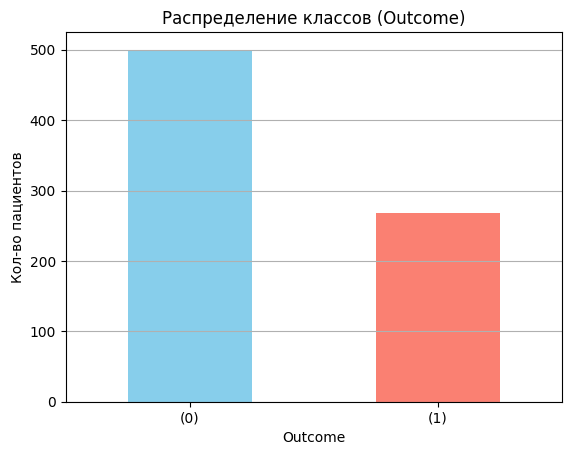

In [6]:
class_counts = df['Outcome'].value_counts()
class_counts.plot(kind='bar', color=["skyblue", "salmon"])
plt.xticks([0, 1], ['(0)', '(1)'], rotation=0)
plt.title("Распределение классов (Outcome)")
plt.ylabel("Кол-во пациентов")
plt.grid(axis='y')
plt.show()

Классы не сбалансированы => нужно выбрать F1 score, так как она наиболее эффективна для неслабансированных классов

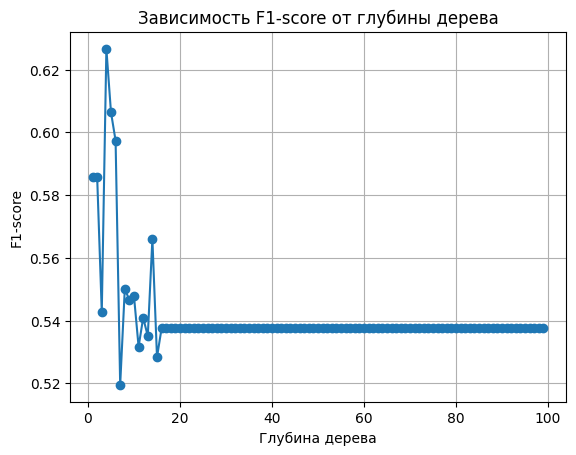

In [7]:
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

depths = range(1, 100)
f1_scores = []

max_depth = 0
max_f1 = 0
for d in depths:
    tree = DecisionTreeClassifier(max_depth=d, random_state=42)
    tree.fit(X_train, y_train)
    pred = tree.predict(X_test)
    score = f1_score(y_test, pred)
    f1_scores.append(score)
    
    if score > max_f1:
        max_f1 = score
        max_depth = d

plt.plot(depths, f1_scores, marker='o')
plt.xlabel("Глубина дерева")
plt.ylabel("F1-score")
plt.title("Зависимость F1-score от глубины дерева")
plt.grid()
plt.show()

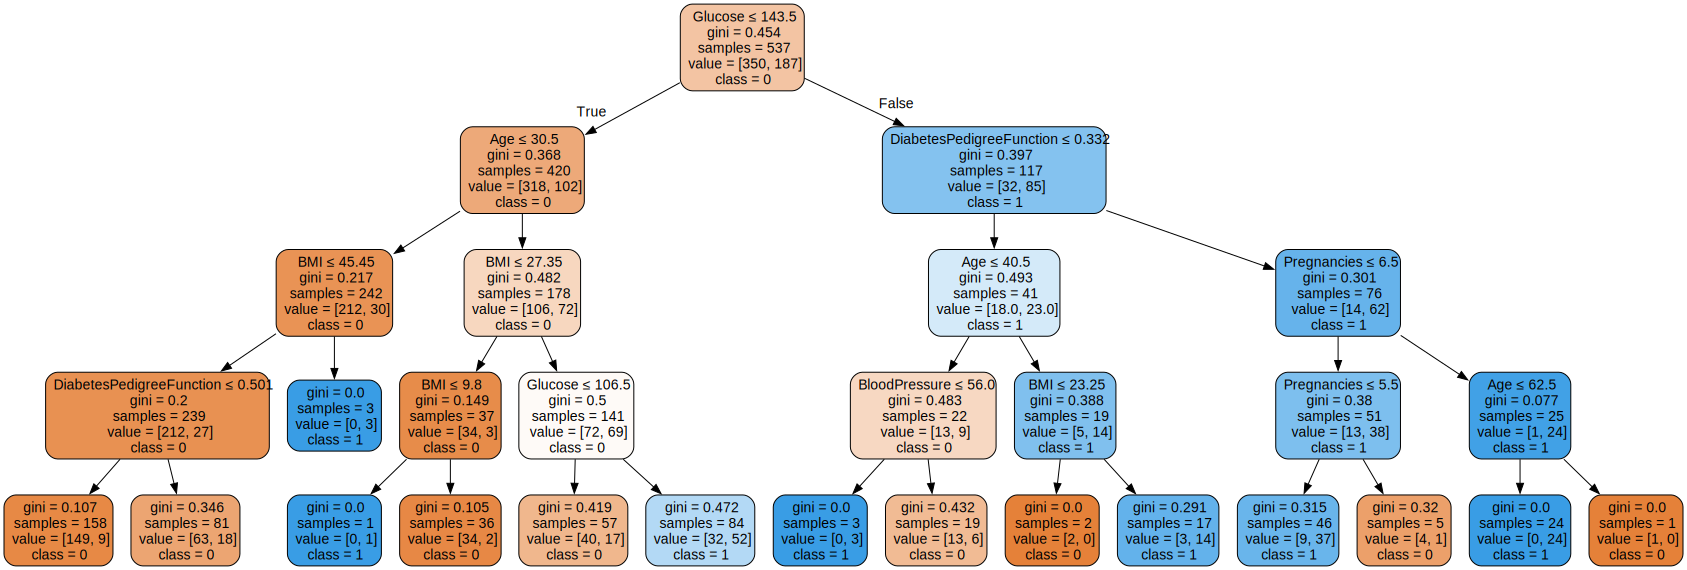

In [8]:
import graphviz
from sklearn import tree

optimal_tree = DecisionTreeClassifier(max_depth=max_depth)
optimal_tree.fit(X_train, y_train)

dot_data = tree.export_graphviz(optimal_tree, out_file=None, 
                                feature_names=df.columns[:-1],
                                class_names=["0", "1"],
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

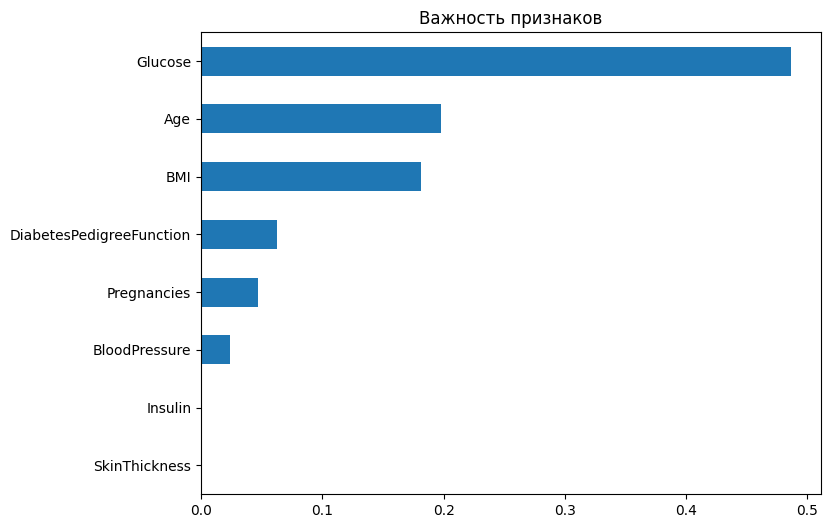

In [10]:
importance = pd.Series(optimal_tree.feature_importances_, index=df.columns[:-1])
importance.sort_values().plot(kind='barh', figsize=(8, 6))
plt.title("Важность признаков")
plt.show()

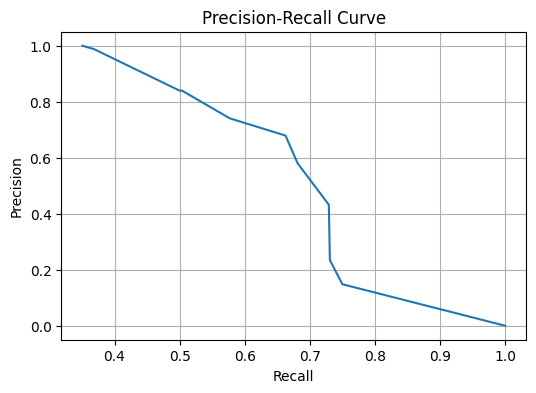

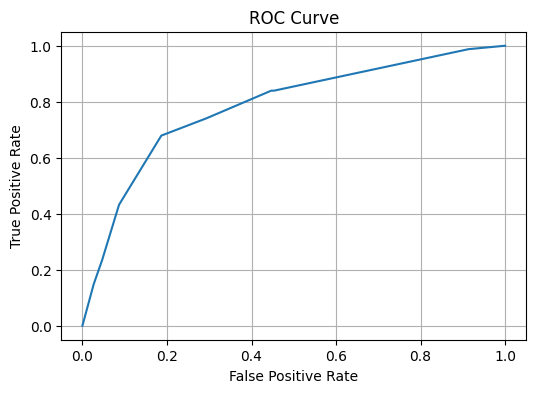

In [12]:
from sklearn.metrics import precision_recall_curve, roc_curve
y_proba = optimal_tree.predict_proba(X_test)
precisions, recalls, _ = precision_recall_curve(y_test, y_proba[:, 1])
plt.figure(figsize=(6, 4))
plt.plot(precisions, recalls, label="PR Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.grid(True)
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_proba[:, 1])
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.grid(True)
plt.show()